Summary Statistics of the Dataset:
               ID         Age      Height      Weight         BMI
count  108.000000  108.000000  108.000000  108.000000  108.000000
mean    56.046296   46.555556  166.574074   59.490741   20.549074
std     31.917939   24.720620   27.873615   28.856233    7.583818
min      1.000000   11.000000  120.000000   10.000000    3.900000
25%     28.750000   27.000000  140.000000   35.000000   16.700000
50%     56.500000   42.500000  175.000000   55.000000   21.200000
75%     83.250000   59.250000  190.000000   85.000000   26.100000
max    110.000000  112.000000  210.000000  120.000000   37.200000


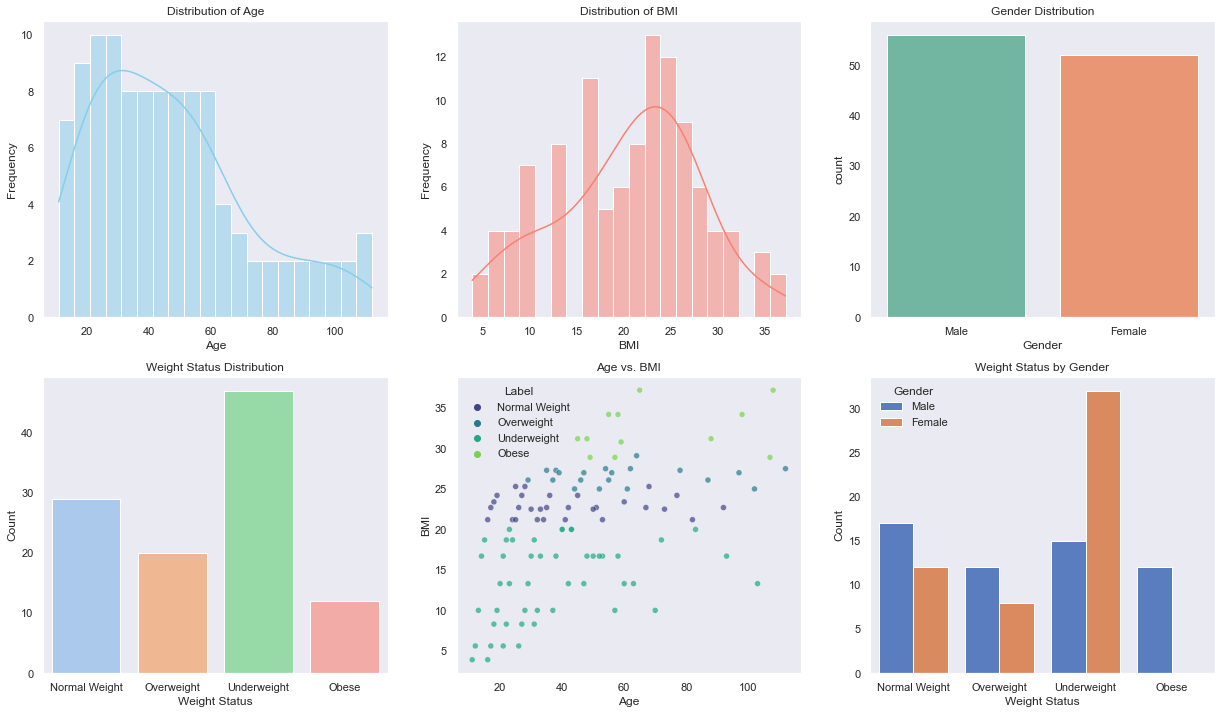

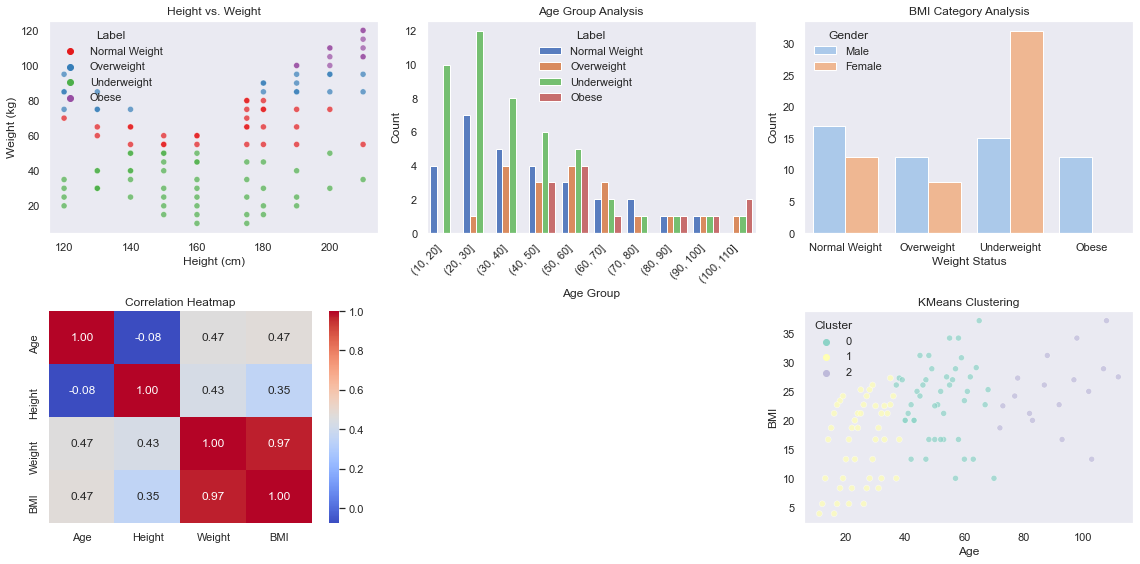

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Create a DataFrame by reading in the data set.
df = pd.read_csv('Obesity Classification.csv')
print("Summary Statistics of the Dataset:")
print(df.describe())

# Set the style for seaborn plots
sns.set(style="dark")

# 1. Age Distribution plot
plt.figure(figsize=(21, 12))
plt.subplot(2, 3, 1)
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# 2. BMI Distribution plot
plt.subplot(2, 3, 2)
sns.histplot(df['BMI'], bins=20, kde=True, color='salmon')
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')

# 3. Gender Distribution plot
plt.subplot(2, 3, 3)
sns.countplot(x='Gender', data=df, palette='Set2')
plt.title('Gender Distribution')

# 4. Weight Status Distribution
plt.subplot(2, 3, 4)
sns.countplot(x='Label', data=df, palette='pastel')
plt.title('Weight Status Distribution')
plt.xlabel('Weight Status')
plt.ylabel('Count')

# 5. Age vs. BMI Scatter Plot
plt.subplot(2, 3, 5)
sns.scatterplot(x='Age', y='BMI', data=df, hue='Label', palette='viridis', alpha=0.7)
plt.title('Age vs. BMI')
plt.xlabel('Age')
plt.ylabel('BMI')

# 6. Weight Status by Gender
plt.subplot(2, 3, 6)
sns.countplot(x='Label', hue='Gender', data=df, palette='muted')
plt.title('Weight Status by Gender')
plt.xlabel('Weight Status')
plt.ylabel('Count')

# 7. Height vs. Weight Scatter Plot
plt.figure(figsize=(16, 8))
plt.subplot(2, 3, 1)
sns.scatterplot(x='Height', y='Weight', data=df, hue='Label', palette='Set1', alpha=0.7)
plt.title('Height vs. Weight')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')

# 8. Age group analysis.
plt.subplot(2, 3, 2)
df['AgeGroup'] = pd.cut(df['Age'], bins=[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110])
ax = sns.countplot(x='AgeGroup', hue='Label', data=df, palette='muted')
plt.title('Age Group Analysis')
plt.xlabel('Age Group')
plt.ylabel('Count')

# 9. BMI Category Analysis
plt.subplot(2, 3, 3)
sns.countplot(x='Label', hue='Gender', data=df, palette='pastel')
plt.title('BMI Category Analysis')
plt.xlabel('Weight Status')
plt.ylabel('Count')

# 10. Correlation Heatmap
plt.subplot(2, 3, 4)
correlation_matrix = df[['Age', 'Height', 'Weight', 'BMI']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')

# 11. KMeans Clustering on 'Age' and 'BMI'
plt.subplot(2, 3, 6)
features_for_clustering = df[['Age', 'BMI']]
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(features_for_clustering)
sns.scatterplot(x='Age', y='BMI', data=df, hue='Cluster', palette='Set3', alpha=0.7)
plt.title('KMeans Clustering')
plt.xlabel('Age')
plt.ylabel('BMI')

#Rotates the x labels of Age group analyis graph by 45 degrees.
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.subplots_adjust(bottom=0.4)

plt.tight_layout()
plt.show()

Text(0.5, 1.02, 'Pair Plot of Numerical Variables by Weight Status')

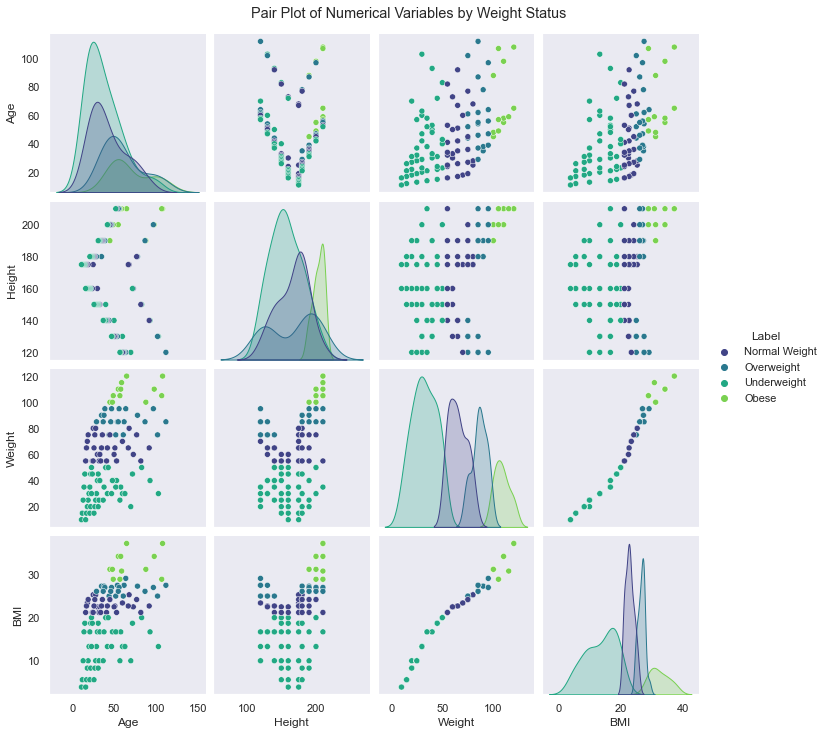

In [39]:
sns.pairplot(df[['Age', 'Height', 'Weight', 'BMI', 'Label']], hue='Label', palette='viridis')
plt.suptitle('Pair Plot of Numerical Variables by Weight Status', y=1.02)